In [56]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
import time

In [3]:
oliv=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [8]:
print(oliv.images.shape)
oliv.data.shape


(1140, 50, 37)


(1140, 1850)

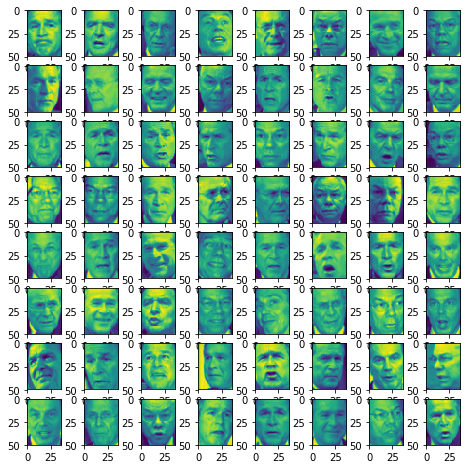

In [10]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv['images'][i])
plt.show()

In [33]:
x=oliv.data
y=oliv.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [34]:
pca=PCA()
transformed_data=pca.fit_transform(x_train)

In [35]:
pca.components_

array([[-4.7421604e-03, -6.0267462e-03, -8.2280617e-03, ...,
        -1.5235058e-02, -1.3695082e-02, -1.2284682e-02],
       [ 2.2136051e-02,  2.1532346e-02,  2.4488494e-02, ...,
        -3.9005127e-02, -3.6322407e-02, -3.5207737e-02],
       [-1.9698283e-02, -1.8769953e-02, -1.9655325e-02, ...,
        -4.9716569e-02, -4.4505201e-02, -3.9879836e-02],
       ...,
       [ 1.7824965e-02, -9.3769990e-03,  1.8329261e-02, ...,
        -5.7137948e-03, -1.7660396e-02,  2.4987977e-02],
       [-7.1762539e-03, -4.1948345e-02, -6.8872301e-03, ...,
        -3.5841186e-02,  1.5023345e-02,  1.1083893e-02],
       [ 8.3824089e-03, -1.3401894e-03, -4.5063170e-03, ...,
         6.8380698e-03, -8.0150225e-05, -7.6995301e-04]], dtype=float32)

In [36]:
total=sum(pca.explained_variance_)
current=0
k=0
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

316

In [52]:
pca=PCA(n_components=k,whiten=True)
transform_data=pca.fit_transform(x_train)

In [38]:
transform_data.shape

(855, 316)

In [39]:
x_transform=pca.inverse_transform(transform_data)
x_transform.shape

(855, 1850)

In [41]:
x_approx_image=x_transform.reshape((855,50,37))


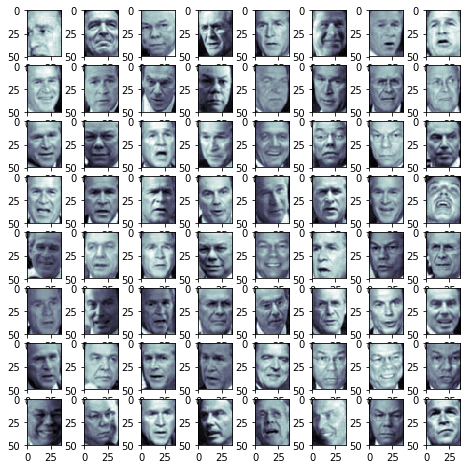

In [42]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_image[i],cmap=plt.cm.bone)
plt.show()

In [53]:
# pca=PCA(n_components=k,whiten=True)
x_train_pca=transform_data
x_test_pca=pca.transform(x_test)
x_test_pca.shape

(285, 316)

In [58]:
clf=ensemble.RandomForestClassifier()
start=time.time()
clf.fit(x_train,y_train)
print(time.time()-start)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5019879341125488
             precision    recall  f1-score   support

          0       0.63      0.61      0.62        61
          1       0.56      0.25      0.35        36
          2       0.61      0.93      0.74       122
          3       0.64      0.23      0.33        31
          4       0.62      0.23      0.33        35

avg / total       0.61      0.61      0.57       285

[[ 37   1  21   1   1]
 [  8   9  16   0   3]
 [  6   2 114   0   0]
 [  3   3  17   7   1]
 [  5   1  18   3   8]]


In [61]:
clf=ensemble.RandomForestClassifier()
start=time.time()
clf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.30306315422058105
             precision    recall  f1-score   support

          0       0.40      0.41      0.40        61
          1       0.54      0.19      0.29        36
          2       0.52      0.80      0.63       122
          3       0.50      0.10      0.16        31
          4       0.29      0.11      0.16        35

avg / total       0.46      0.48      0.43       285

[[25  2 31  0  3]
 [ 9  7 17  2  1]
 [15  4 98  1  4]
 [ 6  0 20  3  2]
 [ 8  0 23  0  4]]


In [67]:
from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(n_neighbors=5)  
start=time.time()
clf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.028001070022583008
             precision    recall  f1-score   support

          0       0.96      0.38      0.54        61
          1       1.00      0.06      0.11        36
          2       0.49      0.98      0.66       122
          3       1.00      0.06      0.12        31
          4       0.57      0.23      0.33        35

avg / total       0.72      0.54      0.46       285

[[ 23   0  36   0   2]
 [  0   2  34   0   0]
 [  0   0 120   0   2]
 [  1   0  26   2   2]
 [  0   0  27   0   8]]
